In [24]:
# https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/images.ipynb#scrollTo=3SDhbo8lOBQv

import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [25]:
data_dir = pathlib.Path("./data/dogs-vs-cats/")

In [26]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [31]:
SEED = 0
BATCH_SIZE = 128
BUFFER_SIZE=200
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = image_count//BATCH_SIZE
CLASS_NAMES = np.array(["cat", "dog"])

tf.random.set_seed(SEED)

In [32]:
def get_label(path):
    s_path = tf.strings.split(path, os.path.sep)[-1]
    label = tf.strings.split(s_path, ".")[0]
    if label == "cat":
        return 0
    else:
        return 1

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(path):
    label = get_label(path)
    img = tf.io.read_file(path)
    img = decode_img(img)
    return img, label

def scale_image(image, label):
    image /= 255
    return image, label

In [34]:
def input_fn():
    list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))
    
    return list_ds \
        .map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
        .map(scale_image) \
        .shuffle(BUFFER_SIZE) \
        .batch(BATCH_SIZE) \
        .prefetch(buffer_size=tf.data.experimental.AUTOTUNE) \
        .repeat()

for image, label in input_fn().take(5):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.shape)

Image shape:  (128, 224, 224, 3)
Label:  (128,)
Image shape:  (128, 224, 224, 3)
Label:  (128,)
Image shape:  (128, 224, 224, 3)
Label:  (128,)
Image shape:  (128, 224, 224, 3)
Label:  (128,)
Image shape:  (128, 224, 224, 3)
Label:  (128,)


In [ ]:
train_ds = input_fn()

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True), 
              metrics=["accuracy"])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                25233472  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 25,234,433
Trainable params: 25,234,433
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(train_ds,  epochs = 10, steps_per_epoch = STEPS_PER_EPOCH / 10)

Train for 19.5 steps
Epoch 1/10
20/19 [==============================] - 31s 2s/step - loss: 0.6952 - accuracy: 0.5184
Epoch 2/10
20/19 [==============================] - 29s 1s/step - loss: 0.6935 - accuracy: 0.4828
Epoch 3/10
20/19 [==============================] - 30s 2s/step - loss: 0.6930 - accuracy: 0.5004
Epoch 4/10
20/19 [==============================] - 31s 2s/step - loss: 0.6929 - accuracy: 0.5016
Epoch 5/10
20/19 [==============================] - 31s 2s/step - loss: 0.6925 - accuracy: 0.4965
Epoch 6/10
20/19 [==============================] - 31s 2s/step - loss: 0.6921 - accuracy: 0.5000
Epoch 7/10
20/19 [==============================] - 30s 2s/step - loss: 0.6903 - accuracy: 0.5020
Epoch 8/10
20/19 [==============================] - 30s 2s/step - loss: 0.6879 - accuracy: 0.4887
Epoch 9/10
20/19 [==============================] - 31s 2s/step - loss: 0.6868 - accuracy: 0.5094
Epoch 10/10
20/19 [==============================] - 30s 1s/step - loss: 0.6842 - accuracy: 0.498

In [21]:
acc = history.history['accuracy']
loss=history.history['loss']

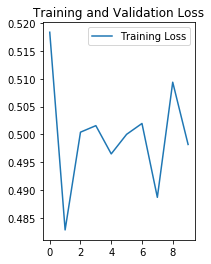

In [23]:
epochs_range = range(10)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()